In [1]:
from qiskit_algorithms.utils import algorithm_globals
from sklearn import datasets
from sklearn.model_selection import train_test_split
from qiskit.circuit.library import ZZFeatureMap, PauliFeatureMap, ZFeatureMap, TwoLocal
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from sklearn.svm import SVC
from qiskit_machine_learning.algorithms import QSVC
import numpy as np
from matplotlib import pyplot as plt
from qiskit_machine_learning.circuit.library import RawFeatureVector
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import BlueprintCircuit
from qiskit.circuit import Parameter
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from qiskit_machine_learning.algorithms import PegasosQSVC

Create Iris training set and test set. Use 2 features and 2 classes to visualize better. 

In [2]:
algorithm_globals.random_seed = 13

#select which class and features to use
class1 = 0
class2 = 2
feature1 = 0
feature2 = 3

iris = datasets.load_iris()

X = iris.data[:, [feature1, feature2]]
y = iris.target

X = X[np.logical_or(y == class1, y == class2)]
y = y[np.logical_or(y == class1, y == class2)]

feature_dimension = X.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

Create feature map. We can use different feauture maps and this is what actually defines the kernel. Here we use PauliFeatureMap with 'Y' settings. Using ZZFeatureMap or more complicated feature maps leads to overfitting on such a simple dataset.

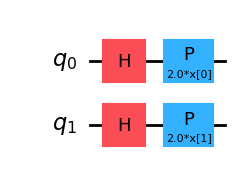

In [8]:
#feature_map = PauliFeatureMap(feature_dimension=feature_dimension, reps=1, paulis=['Y'])
feature_map = ZFeatureMap(feature_dimension=feature_dimension, reps=1)
feature_map.decompose().draw('mpl')

Create Kernel and go back to classical sklearn. Train and plot accuracy on test set and decision boundary. 

Accuracy:  1.0


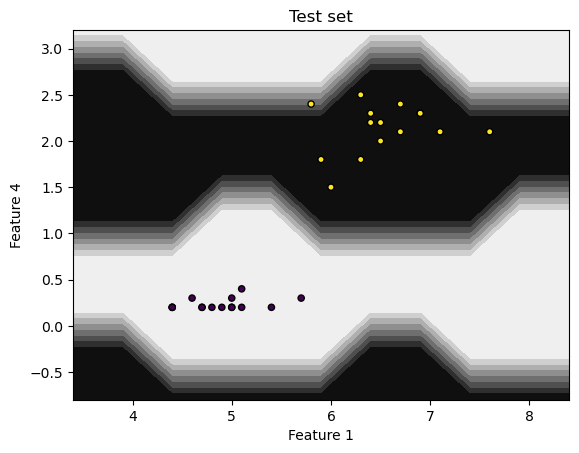

In [9]:
#create quantum kernel
kernel = FidelityQuantumKernel(feature_map=feature_map)

svm = PegasosQSVC(quantum_kernel=kernel, C=1, num_steps=100)
svm.fit(X_train,y_train)

print('Accuracy: ', svm.score(X_test, y_test))

#plot decision boundary
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5), np.arange(y_min, y_max, 0.5))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='binary')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=20, edgecolor='k')
plt.xlabel(f'Feature {feature1+1}')
plt.ylabel(f'Feature {feature2+1}')
plt.title('Test set')
plt.show()

Let's try using all the features.

In [14]:
algorithm_globals.random_seed = 13

iris = datasets.load_iris()

class1=0
class2=1

X = iris.data
y = iris.target

X = X[np.logical_or(y == class1, y == class2)]
y = y[np.logical_or(y == class1, y == class2)]

feature_dimension = X.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

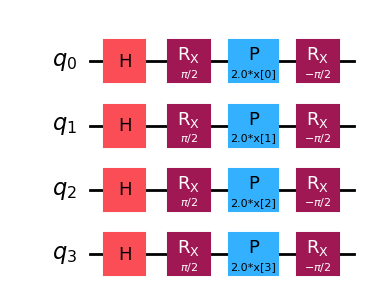

In [15]:
feature_map = PauliFeatureMap(feature_dimension=feature_dimension, reps=1, paulis=['Y'])
feature_map.decompose().draw('mpl')

In [16]:
#create quantum kernel
kernel = FidelityQuantumKernel(feature_map=feature_map)

#fit classical SVM
svm = PegasosQSVC(quantum_kernel=kernel, C=1, num_steps=100)
svm.fit(X_train,y_train)

print('Accuracy: ', svm.score(X_test, y_test))

Accuracy:  1.0
